Accidents in traffic lead to associated fatalities and economic losses every year worldwide and thus is an area of primary concern to society from loss prevention point of view. Modeling accident severity prediction and improving the model are critical to the effective performance of road traffic systems for improved safety. In accident severity modeling, the input vectors are the characteristics of the accident, such as driver behavior and attributes of vehicle, highway and environment characteristics while the output vector is the corresponding class of accident severity.

There are two main engineering approaches for dealing with traffic safety problems: the reactive approach and the proactive approach. The reactive approach, or retrofit approach, consists of making the necessary improvements to variable, for instance, existing hazardous sites in order to reduce collision frequency and severity at these sites. The proactive approach, on the other hand, includes a collision prevention approach, like, preventing a potential unsafe road conditions from occurring in the first place. We focus on proactive approach which involves prediction of accident severity and working backwards, the concerned entity implements appropriate remedial measures to improve road safety. By recognizing the key factors that influence accident severity, the solution may be of great utility to various Government Departments/Authorities like Police, R&B and Transport from public policy point of view. The results of analysis and modeling can be used by these Departments to take appropriate measures to reduce accident impact and thereby improve traffic safety. It is also useful to the Insurers in terms of reduced claims and better underwriting as well as rate making.

importing the libraries

In [2]:
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler

loading of file using pandas

In [4]:
data_test = pd.read_csv("C:\\Users\\ARPIT\\Desktop\\Talentsprit\\practice_code\\Kaggle\\Accident\\Accident_train.csv")
data_test=shuffle(data_test)
#data_test["Policing_Area"]

Predictive variable=y=colliosion_severity

checking file properties(shape,columns)

In [5]:
print ('shape of data:',data_test.shape)
print ('no. of sample :',data_test.shape[0])
print ('no. of features including label:',data_test.shape[1])
print ('columns:', data_test.columns.values)

shape of data: (10043, 17)
no. of sample : 10043
no. of features including label: 17
columns: ['Collision_Severity' 'Collision_Ref_No' 'Policing_Area'
 'Weekday_of_Collision' 'Day_of_Collision' 'Month_of_Collision'
 'Hour_of_Collision' 'Carriageway_Type' 'Speed_Limit' 'Junction_Detail'
 'Junction_Control' 'Ped_Crossing_HC' 'Ped_Crossing_PC' 'Light_Conditions'
 'Weather_Conditions' 'Road_Surface_Conditions'
 'Special_Conditions_at_Site']


In [4]:
# data_test.head()

data that we have is categorical in nature so we need to do preprocessing of the data and covert string into some interger categories

In [5]:
#we will use label encode from sklearn to change categorical data into numeric format

In [6]:
lb_make = LabelEncoder()
# def encode(column_name):
#     for i in column_name:
#         data_test[i]=lb_make.fit_transform(data_test["Policing_Area"].astype(str))
data_test["Policing_Area_new"] = lb_make.fit_transform(data_test["Policing_Area"].astype(str))
data_test["Weekday_of_Collision_new"] = lb_make.fit_transform(data_test["Weekday_of_Collision"].astype(str))
data_test["Day_of_Collision_new"] = lb_make.fit_transform(data_test["Day_of_Collision"].astype(str))
data_test["Month_of_Collision_new"] = lb_make.fit_transform(data_test["Month_of_Collision"].astype(str))
data_test["Hour_of_Collision_new"] = lb_make.fit_transform(data_test["Hour_of_Collision"].astype(str))
data_test["Carriageway_Type_new"] = lb_make.fit_transform(data_test["Carriageway_Type"].astype(str))
data_test["Speed_Limit_new"] = lb_make.fit_transform(data_test["Speed_Limit"].astype(str))
data_test["Junction_Detail_new"] = lb_make.fit_transform(data_test["Junction_Detail"].astype(str))
data_test["Junction_Control_new"] = lb_make.fit_transform(data_test["Junction_Control"].astype(str))
data_test["Ped_Crossing_HC_new"] = lb_make.fit_transform(data_test["Ped_Crossing_HC"].astype(str))
data_test["Ped_Crossing_PC_new"] = lb_make.fit_transform(data_test["Ped_Crossing_PC"].astype(str))
data_test["Light_Conditions_new"] = lb_make.fit_transform(data_test["Light_Conditions"].astype(str))
data_test["Weather_Conditions_new"] = lb_make.fit_transform(data_test["Weather_Conditions"].astype(str))
data_test["Road_Surface_Conditions_new"] = lb_make.fit_transform(data_test["Road_Surface_Conditions"].astype(str))
data_test["Special_Conditions_at_Site_new"] = lb_make.fit_transform(data_test["Special_Conditions_at_Site"].astype(str))


In [11]:
#print (data_test.head(10))
print (data_test.columns.values)
data_test=data_test.drop(['Collision_Ref_No', 'Policing_Area','Weekday_of_Collision', 'Day_of_Collision' ,'Month_of_Collision','Hour_of_Collision', 'Carriageway_Type', 'Speed_Limit', 'Junction_Detail','Junction_Control', 'Ped_Crossing_HC', 'Ped_Crossing_PC', 'Light_Conditions','Weather_Conditions', 'Road_Surface_Conditions','Special_Conditions_at_Site'],axis=1)
data_test.columns.values #we added new columns using encoder

['Collision_Severity' 'Collision_Ref_No' 'Policing_Area'
 'Weekday_of_Collision' 'Day_of_Collision' 'Month_of_Collision'
 'Hour_of_Collision' 'Carriageway_Type' 'Speed_Limit' 'Junction_Detail'
 'Junction_Control' 'Ped_Crossing_HC' 'Ped_Crossing_PC' 'Light_Conditions'
 'Weather_Conditions' 'Road_Surface_Conditions'
 'Special_Conditions_at_Site' 'Policing_Area_new'
 'Weekday_of_Collision_new' 'Day_of_Collision_new'
 'Month_of_Collision_new' 'Hour_of_Collision_new' 'Carriageway_Type_new'
 'Speed_Limit_new' 'Junction_Detail_new' 'Junction_Control_new'
 'Ped_Crossing_HC_new' 'Ped_Crossing_PC_new' 'Light_Conditions_new'
 'Weather_Conditions_new' 'Road_Surface_Conditions_new'
 'Special_Conditions_at_Site_new']


array(['Collision_Severity', 'Policing_Area_new',
       'Weekday_of_Collision_new', 'Day_of_Collision_new',
       'Month_of_Collision_new', 'Hour_of_Collision_new',
       'Carriageway_Type_new', 'Speed_Limit_new', 'Junction_Detail_new',
       'Junction_Control_new', 'Ped_Crossing_HC_new',
       'Ped_Crossing_PC_new', 'Light_Conditions_new',
       'Weather_Conditions_new', 'Road_Surface_Conditions_new',
       'Special_Conditions_at_Site_new'], dtype=object)

In [8]:
#data_test.head(25)

checking for missing values in the given dataset

In [12]:
null_columns=data_test.columns[data_test.isnull().any()]
data_test[null_columns].isnull().sum()
print ('columns which are having missing values:',data_test.columns.values)

columns which are having missing values: ['Collision_Severity' 'Policing_Area_new' 'Weekday_of_Collision_new'
 'Day_of_Collision_new' 'Month_of_Collision_new' 'Hour_of_Collision_new'
 'Carriageway_Type_new' 'Speed_Limit_new' 'Junction_Detail_new'
 'Junction_Control_new' 'Ped_Crossing_HC_new' 'Ped_Crossing_PC_new'
 'Light_Conditions_new' 'Weather_Conditions_new'
 'Road_Surface_Conditions_new' 'Special_Conditions_at_Site_new']


#to make our dataset more appropriate we we have many options
1) drop the rows which are having null(NA) values
2) apply KNN and get the value 
3)calculte missing value as per mean
4)according to max among all the values etc....

In [10]:
#here we are using mean of all the values across the column and taking its floor

In [13]:
for i in null_columns:
    data_test.loc[:][i]= data_test.loc[:][i].fillna(value = np.floor(np.mean(data_test.loc[:][i])))

checking data and correlation between variables


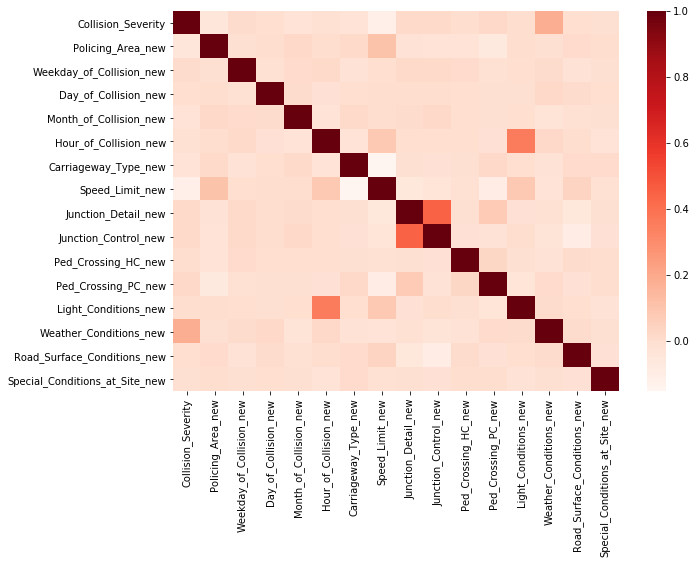

In [14]:
plt.subplots(figsize=(10,7))
data_corr=data_test.corr()
sns.heatmap(data_corr,xticklabels=data_corr.columns.values,yticklabels=data_corr.columns.values, cmap="Reds")
plt.show()

clearly visible from heatmap junction Details and junction_control is higly corrleated
as well as collision_ref_no and month of collision are correlated 

#we will drop month of collision and collision_ref_no as these featues are correlated and byt dropping this will not effect much in our prediction

In [15]:
data_test=data_test.drop(['Junction_Detail_new','Ped_Crossing_HC_new','Light_Conditions_new'],axis=1)

In [16]:
data_test.columns.values #checking available columns

array(['Collision_Severity', 'Policing_Area_new',
       'Weekday_of_Collision_new', 'Day_of_Collision_new',
       'Month_of_Collision_new', 'Hour_of_Collision_new',
       'Carriageway_Type_new', 'Speed_Limit_new', 'Junction_Control_new',
       'Ped_Crossing_PC_new', 'Weather_Conditions_new',
       'Road_Surface_Conditions_new', 'Special_Conditions_at_Site_new'],
      dtype=object)

In [17]:
#checking severity count
data_test.groupby(['Collision_Severity'])['Collision_Severity'].agg(['count'])

,count
Collision_Severity,
1,120
2,959
3,8964


checking features importance with respect to output


In [16]:
# print (data_test.groupby(['Collision_Severity','Junction_Control'])['Junction_Control'].agg(['count'])) # data not evenly distributed
# print (data_test.groupby(['Collision_Severity','Carriageway_Type'])['Carriageway_Type'].agg(['count']))#not evenly distributed
# print (data_test.groupby(['Collision_Severity','Hour_of_Collision'])['Hour_of_Collision'].agg(['count']))#not evenly distributed
# print (data_test.groupby(['Collision_Severity','Speed_Limit'])['Speed_Limit'].agg(['count']))#not distributed
# print (data_test.groupby(['Collision_Severity','Light_Conditions'])['Light_Conditions'].agg(['count']))#not evenly distributed
# print (data_test.groupby(['Collision_Severity','Weather_Conditions'])['Weather_Conditions'].agg(['count']))#not evenly distributed
# print (data_test.groupby(['Collision_Severity','Road_Surface_Conditions'])['Road_Surface_Conditions'].agg(['count']))#not evenly distributed
# print (data_test.groupby(['Collision_Severity','Special_Conditions_at_Site'])['Special_Conditions_at_Site'].agg(['count']))#not evenly distributed

all features are equally important for predicting the severity of collision


['Collision_Severity' 'Collision_Ref_No' 'Policing_Area'
 'Weekday_of_Collision' 'Day_of_Collision' 'Month_of_Collision'
 'Hour_of_Collision' 'Carriageway_Type' 'Speed_Limit' 'Junction_Detail'
 'Junction_Control' 'Ped_Crossing_HC' 'Ped_Crossing_PC' 'Light_Conditions'
 'Weather_Conditions' 'Road_Surface_Conditions'
 'Special_Conditions_at_Site' 'Policing_Area_new'
 'Weekday_of_Collision_new' 'Day_of_Collision_new'
 'Month_of_Collision_new' 'Hour_of_Collision_new' 'Carriageway_Type_new'
 'Speed_Limit_new' 'Junction_Detail_new' 'Junction_Control_new'
 'Ped_Crossing_HC_new' 'Ped_Crossing_PC_new' 'Light_Conditions_new'
 'Weather_Conditions_new' 'Road_Surface_Conditions_new'
 'Special_Conditions_at_Site_new']
columns which are having missing values: ['Collision_Severity' 'Policing_Area_new' 'Weekday_of_Collision_new'
 'Day_of_Collision_new' 'Month_of_Collision_new' 'Hour_of_Collision_new'
 'Carriageway_Type_new' 'Speed_Limit_new' 'Junction_Detail_new'
 'Junction_Control_new' 'Ped_Crossing_HC

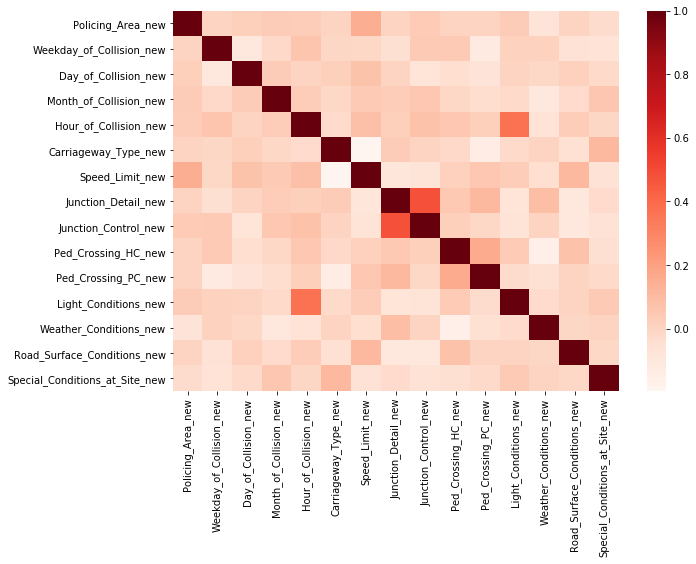

array(['Collision_Severity', 'Policing_Area_new',
       'Weekday_of_Collision_new', 'Day_of_Collision_new',
       'Month_of_Collision_new', 'Hour_of_Collision_new',
       'Carriageway_Type_new', 'Speed_Limit_new', 'Junction_Control_new',
       'Ped_Crossing_PC_new', 'Weather_Conditions_new',
       'Road_Surface_Conditions_new', 'Special_Conditions_at_Site_new'],
      dtype=object)

In [24]:
data_t = pd.read_csv("C:\\Users\\ARPIT\\Desktop\\Talentsprit\\practice_code\\Kaggle\\Accident\\Accident_test.csv")
lb_make = LabelEncoder()

data_t["Policing_Area_new"] = lb_make.fit_transform(data_t["Policing_Area"].astype(str))
data_t["Weekday_of_Collision_new"] = lb_make.fit_transform(data_t["Weekday_of_Collision"].astype(str))
data_t["Day_of_Collision_new"] = lb_make.fit_transform(data_t["Day_of_Collision"].astype(str))
data_t["Month_of_Collision_new"] = lb_make.fit_transform(data_t["Month_of_Collision"].astype(str))
data_t["Hour_of_Collision_new"] = lb_make.fit_transform(data_t["Hour_of_Collision"].astype(str))
data_t["Carriageway_Type_new"] = lb_make.fit_transform(data_t["Carriageway_Type"].astype(str))
data_t["Speed_Limit_new"] = lb_make.fit_transform(data_t["Speed_Limit"].astype(str))
data_t["Junction_Detail_new"] = lb_make.fit_transform(data_t["Junction_Detail"].astype(str))
data_t["Junction_Control_new"] = lb_make.fit_transform(data_t["Junction_Control"].astype(str))
data_t["Ped_Crossing_HC_new"] = lb_make.fit_transform(data_t["Ped_Crossing_HC"].astype(str))
data_t["Ped_Crossing_PC_new"] = lb_make.fit_transform(data_t["Ped_Crossing_PC"].astype(str))
data_t["Light_Conditions_new"] = lb_make.fit_transform(data_t["Light_Conditions"].astype(str))
data_t["Weather_Conditions_new"] = lb_make.fit_transform(data_t["Weather_Conditions"].astype(str))
data_t["Road_Surface_Conditions_new"] = lb_make.fit_transform(data_t["Road_Surface_Conditions"].astype(str))
data_t["Special_Conditions_at_Site_new"] = lb_make.fit_transform(data_t["Special_Conditions_at_Site"].astype(str))

print(data_t.columns.values)
data_t=data_t.drop(['Collision_Ref_No', 'Policing_Area','Weekday_of_Collision', 'Day_of_Collision' ,'Month_of_Collision','Hour_of_Collision', 'Carriageway_Type', 'Speed_Limit', 'Junction_Detail','Junction_Control', 'Ped_Crossing_HC', 'Ped_Crossing_PC', 'Light_Conditions','Weather_Conditions', 'Road_Surface_Conditions','Special_Conditions_at_Site'],axis=1)
data_t.columns.values #we added new columns using encoder
null_columns=data_t.columns[data_t.isnull().any()]
data_t[null_columns].isnull().sum()
print ('columns which are having missing values:',data_t.columns.values)
for i in null_columns:
    data_t.loc[:][i]= data_t.loc[:][i].fillna(value = np.floor(np.mean(data_t.loc[:][i])))

plt.subplots(figsize=(10,7))
data_corr=data_t.corr()
sns.heatmap(data_corr,xticklabels=data_corr.columns.values,yticklabels=data_corr.columns.values, cmap="Reds")
plt.show()
data_t=data_t.drop(['Junction_Detail_new','Ped_Crossing_HC_new','Light_Conditions_new'],axis=1)

data_t.columns.values


In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
# x_train=data_test.values[:9000,1:]
# x_test=data_test.values[9000:,1:]
ros = RandomOverSampler(random_state=0)
x_train, y_train = ros.fit_sample(data_test.values[:9000,1:], data_test.values[:9000,0])
#x_test, y_test = ros.fit_sample(data_test.values[9000:,1:], data_test.values[9000:,0])
x_test=data_test.values[9000:,1:]
y_test=data_test.values[9000:,0]


y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)
model10 = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model10.add(Dense(100, activation='relu', input_dim=12))
model10.add(Dropout(0.5))
model10.add(Dense(80, activation='relu'))
model10.add(Dropout(0.5))
model10.add(Dense(60, activation='relu'))
model10.add(Dropout(0.5))
model10.add(Dense(30, activation='relu'))
model10.add(Dropout(0.5))
model10.add(Dense(15, activation='relu'))
model10.add(Dropout(0.5))
model10.add(Dropout(0.5))
model10.add(Dense(10, activation='relu'))
model10.add(Dropout(0.5))
model10.add(Dense(8, activation='relu'))
model10.add(Dropout(0.5))
model10.add(Dense(4, activation='softmax'))


In [33]:
adam=keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model10.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model10.fit(x_train, y_train,epochs=100,batch_size=500)

Epoch 1/100
24054/24054 [==============================] - 5s 218us/step - loss: 1.5052 - acc: 0.3281
Epoch 2/100
24054/24054 [==============================] - 2s 73us/step - loss: 1.2054 - acc: 0.3304
Epoch 3/100
24054/24054 [==============================] - 2s 77us/step - loss: 1.1629 - acc: 0.3318
Epoch 4/100
24054/24054 [==============================] - 2s 67us/step - loss: 1.1421 - acc: 0.3315
Epoch 5/100
24054/24054 [==============================] - 1s 59us/step - loss: 1.1308 - acc: 0.3310
Epoch 6/100
24054/24054 [==============================] - 1s 55us/step - loss: 1.1235 - acc: 0.3303
Epoch 7/100
24054/24054 [==============================] - 1s 51us/step - loss: 1.1186 - acc: 0.3315
Epoch 8/100
24054/24054 [==============================] - 1s 49us/step - loss: 1.1152 - acc: 0.3325
Epoch 9/100
24054/24054 [==============================] - 1s 49us/step - loss: 1.1124 - acc: 0.3308
Epoch 10/100
24054/24054 [==============================] - 1s 51us/step - loss: 1.1106 - 

Epoch 81/100
24054/24054 [==============================] - 1s 30us/step - loss: 1.0991 - acc: 0.3365
Epoch 82/100
24054/24054 [==============================] - 1s 29us/step - loss: 1.0993 - acc: 0.3325
Epoch 83/100
24054/24054 [==============================] - 1s 29us/step - loss: 1.0991 - acc: 0.3334
Epoch 84/100
24054/24054 [==============================] - 1s 29us/step - loss: 1.0994 - acc: 0.3325
Epoch 85/100
24054/24054 [==============================] - 1s 29us/step - loss: 1.0991 - acc: 0.3339
Epoch 86/100
24054/24054 [==============================] - 1s 29us/step - loss: 1.0992 - acc: 0.3318: 0s - loss: 1.0991 - acc: 0.3
Epoch 87/100
24054/24054 [==============================] - 1s 29us/step - loss: 1.0992 - acc: 0.3340
Epoch 88/100
24054/24054 [==============================] - 1s 29us/step - loss: 1.0990 - acc: 0.3318
Epoch 89/100
24054/24054 [==============================] - 1s 28us/step - loss: 1.0992 - acc: 0.3301
Epoch 90/100
24054/24054 [==========================

In [34]:
print (x_test.shape)
print (y_test.shape)
print (x_train.shape)
print (y_train.shape)

a=model10.predict(x_test)
a=np.max(a,axis=1)
#pd.DataFrame(a).to_csv('op.csv')
#pd.DataFrame(x_train).to_csv('skew_train.csv')

(1043, 12)
(1043, 4)
(24054, 12)
(24054, 4)


In [35]:

mlp = MLPClassifier(hidden_layer_sizes=(30,15,10,8,4))
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 15, 10, 8, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = mlp.predict(x_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.07      0.31      0.11        13
          2       0.09      0.37      0.15        84
          3       0.96      0.58      0.72       946

avg / total       0.88      0.56      0.67      1043



C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\tools\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [37]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = mlp.predict(data_t.values[:,1:])


In [38]:
predictions

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [41]:
from sklearn import svm
x_train, y_train = ros.fit_sample(data_test.values[:9000,1:], data_test.values[:9000,0])
clf = svm.SVC()
clf.fit(x_train, y_train)
clf.predict(x_test)

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [42]:
a=clf.predict(data_t.values[:,1:])

In [29]:
pd.DataFrame(a).to_csv('sub46.csv', index=False)

In [ ]:
pd.DataFrame()

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(x_train, y_train)
b=clf.predict(data_t.values[:,1:])
pd.DataFrame(b).to_csv('team46.csv')

In [43]:
d=0
print (len(a))
for i in a:
    if i!=3:
        d+=1
print (d)

354
3
